## Tarea 001 - MIR
### Gustavo Hernández Angeles

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# Obtenemos los archivos de características y etiquetas
TRAIN_DATA_DIR = './data/train/'
features_files = [TRAIN_DATA_DIR + file for file in os.listdir(TRAIN_DATA_DIR)]
labels_file = features_files.pop()

In [23]:
labels_df = pd.read_csv(labels_file)
labels = labels_df['track.genre1']

## Inciso a): Analisis Exploratorio

### Sobre las clases

<Axes: ylabel='track.genre1'>

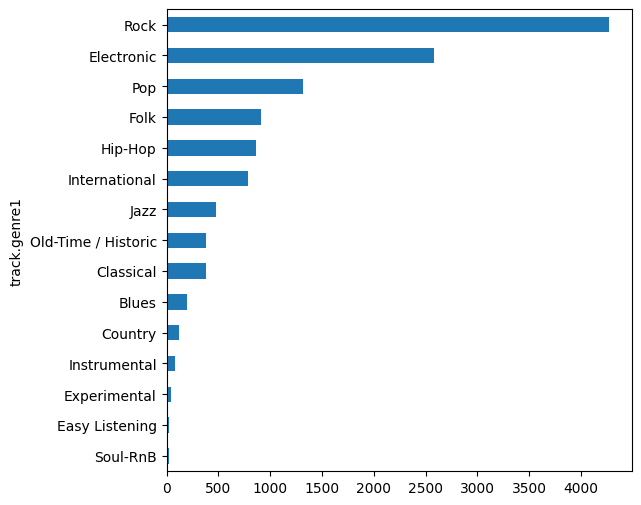

In [36]:
labels.value_counts(normalize=False, sort=True, ascending=True).plot(kind='barh', figsize=(6, 6))

In [1]:
# Planeo realizar PCA sobre cada conjunto de datos (features) que se dieron, junto con sus respectivas etiquetas.
# Luego, graficaré los resultados en 2D y 3D para visualizar cómo se distribuyen los datos en el espacio reducido.

In [29]:
def get_pca_data(features_file, labels_file, n_components=3):
    # Cargar las características y etiquetas
    features = pd.read_csv(features_file)

    st_scaler = StandardScaler()
    features = st_scaler.fit_transform(features)
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(features)

    return pca_data

In [30]:
def plot_2d(data, labels, title, label_names=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Use a qualitative colormap for better distinction
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab20', alpha=0.7)
    
    # Create legend with class names if provided
    if label_names is not None:
        unique_labels = np.unique(labels)
        handles = []
        for i, label_idx in enumerate(unique_labels):
            color = plt.cm.tab20(label_idx / len(unique_labels))
            handles.append(plt.Line2D([], [], marker='o', color='w', 
                                    markerfacecolor=color, label=label_names[label_idx], 
                                    markersize=8, linestyle=''))
        ax.legend(handles=handles, title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig, ax

In [ ]:
def plot_3d(data, labels, title, label_names=None):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Use a qualitative colormap for better distinction
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='tab20', alpha=0.7)
    
    # POR REVISAR
    if label_names is not None:
        unique_labels = np.unique(labels)
        handles = []
        for i, label_idx in enumerate(unique_labels):
            color = plt.cm.tab20(label_idx / len(unique_labels))
            handles.append(plt.Line2D([], [], marker='o', color='w', 
                                    markerfacecolor=color, label=label_names[label_idx], 
                                    markersize=8, linestyle=''))
        ax.legend(handles=handles, title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.tight_layout()
    return fig, ax

In [37]:
# Cargar etiquetas y crear encoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels.values.flatten())
label_names = le.classes_  # Get the original class names
label_names

array(['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic',
       'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International',
       'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB'],
      dtype=object)

Processing feature set: rmse


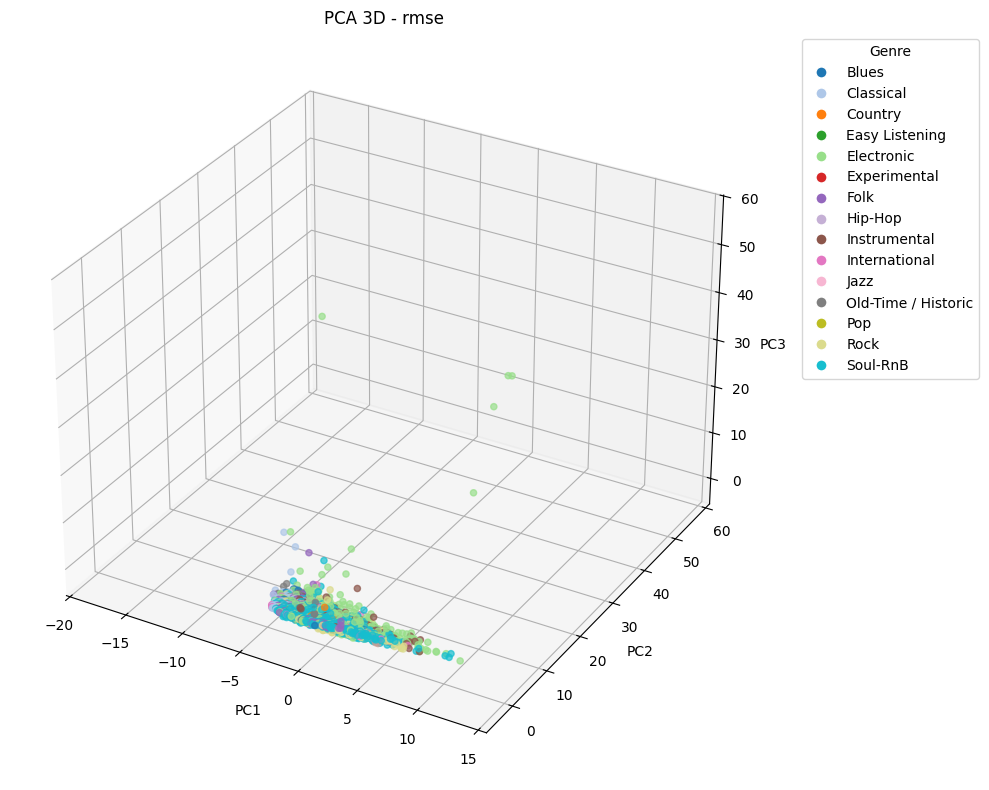

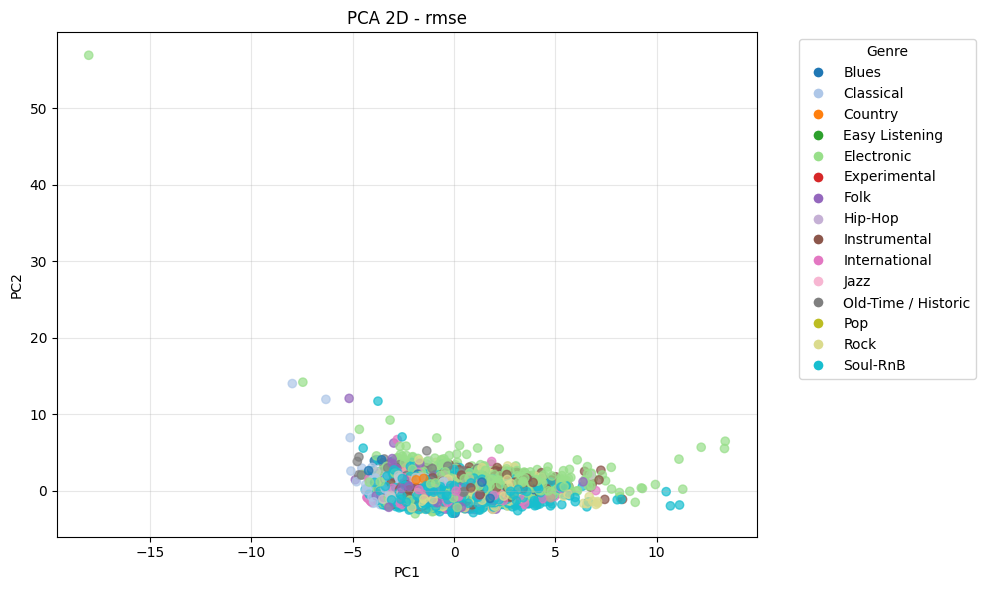

Processing feature set: chromastft


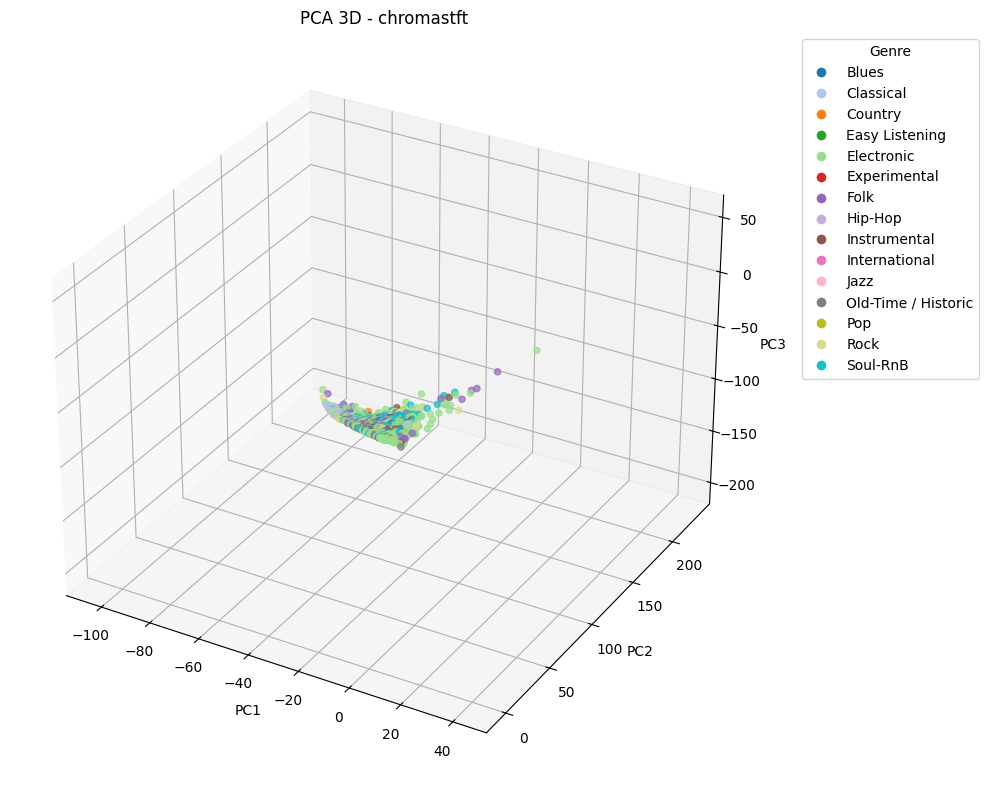

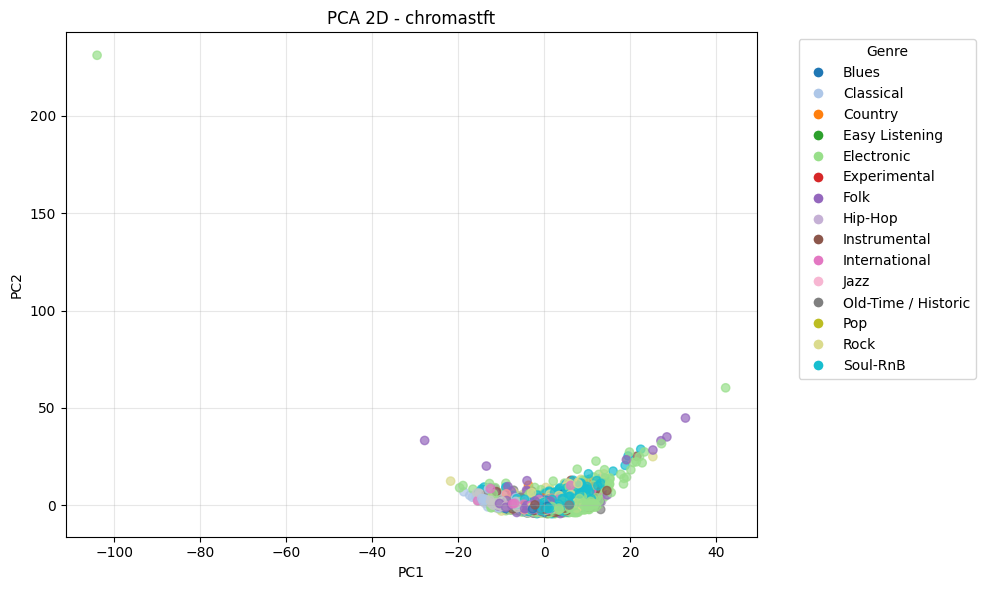

Processing feature set: audio


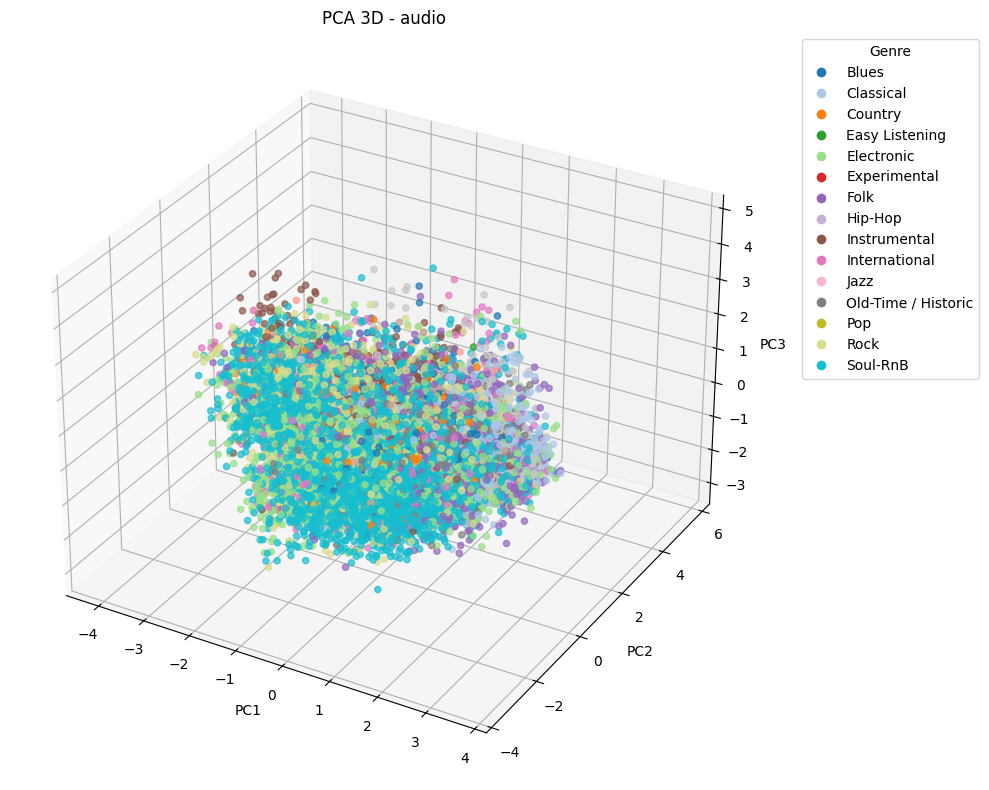

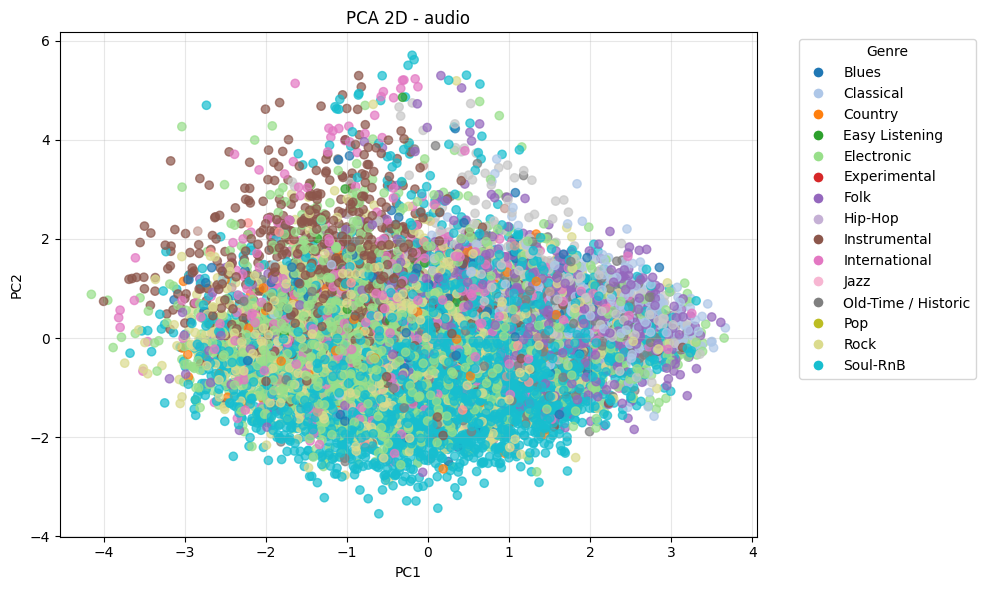

Processing feature set: spectral


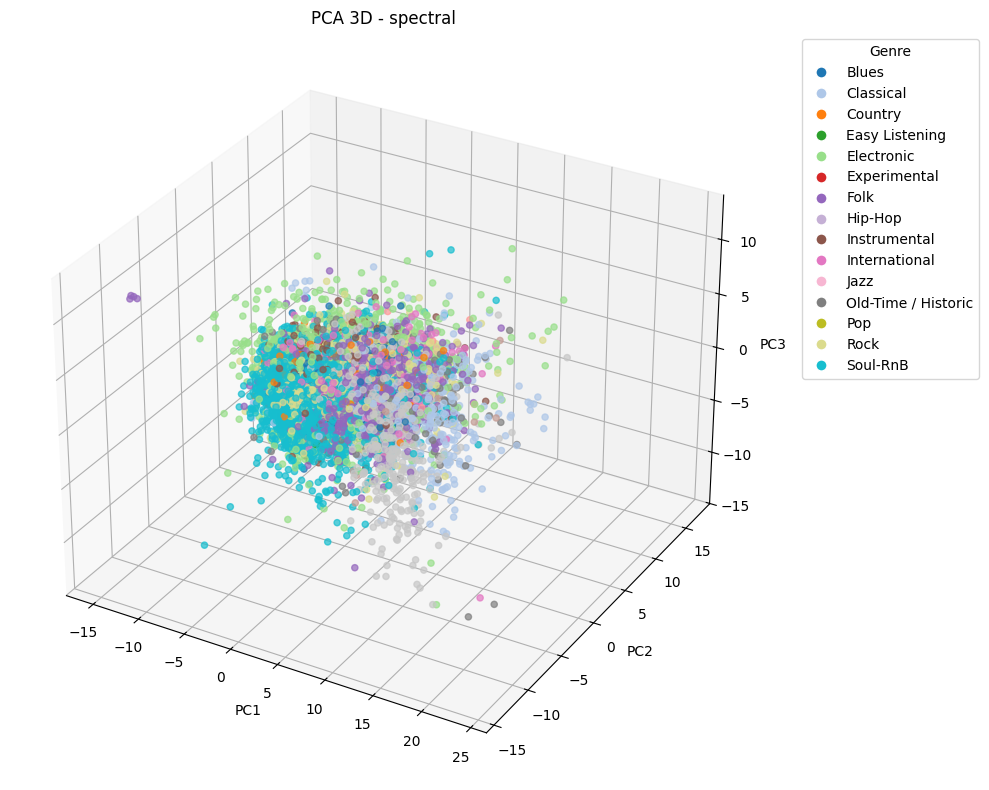

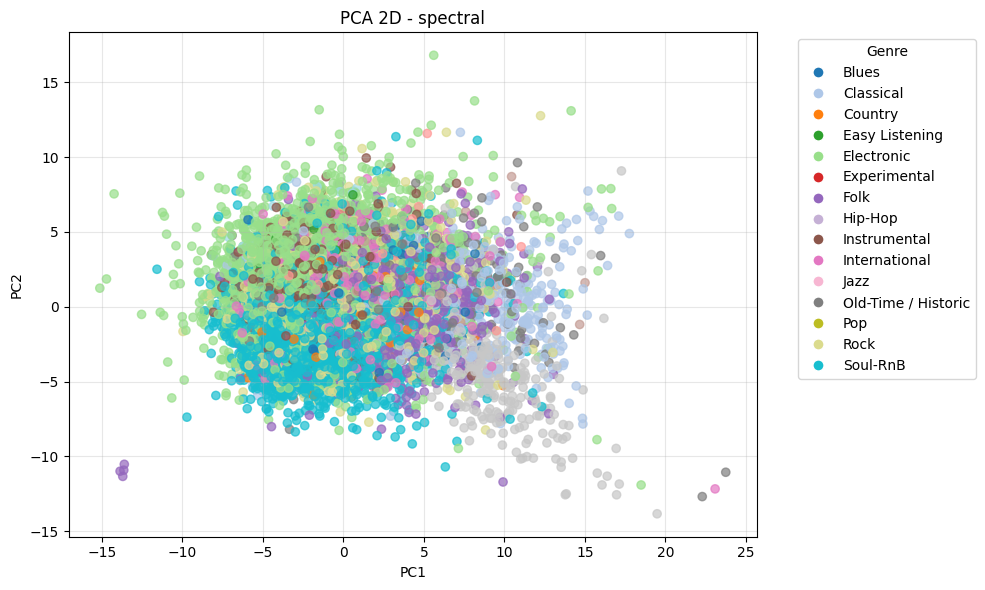

Processing feature set: chromacqt


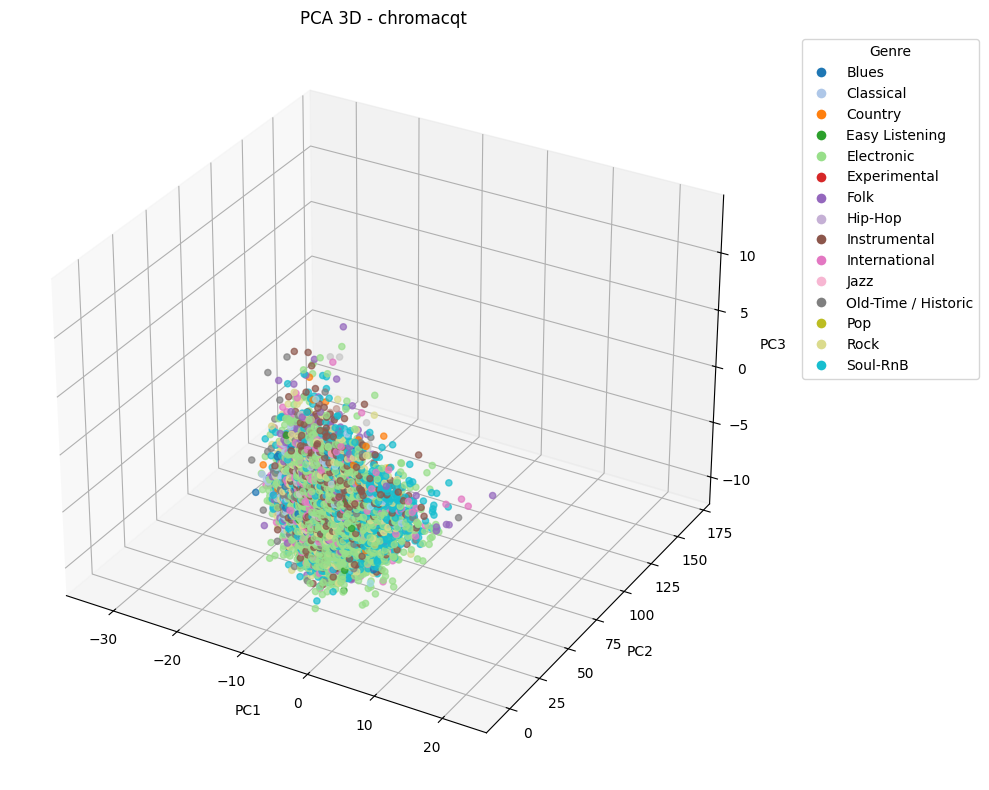

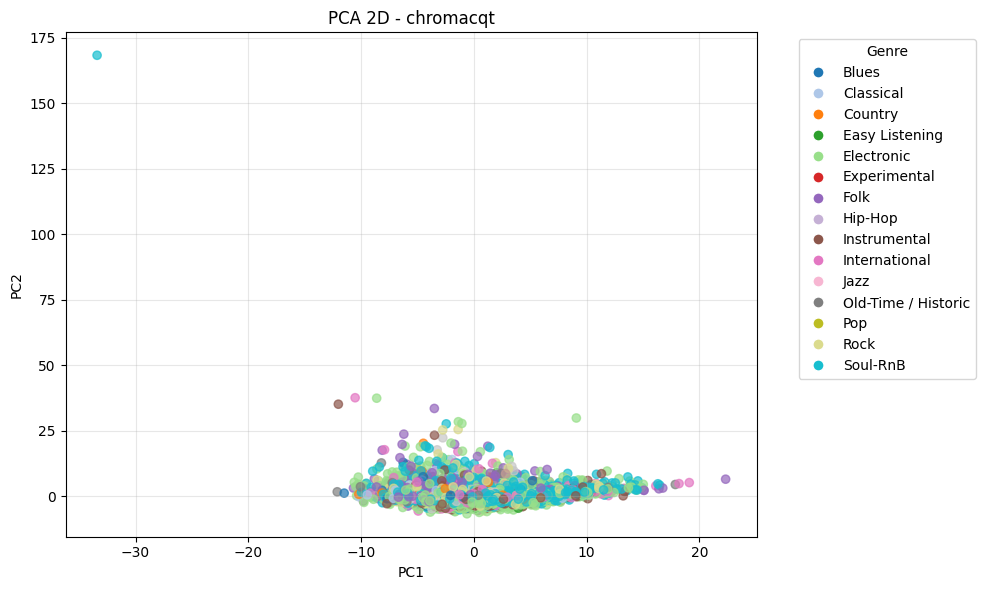

Processing feature set: mfcc


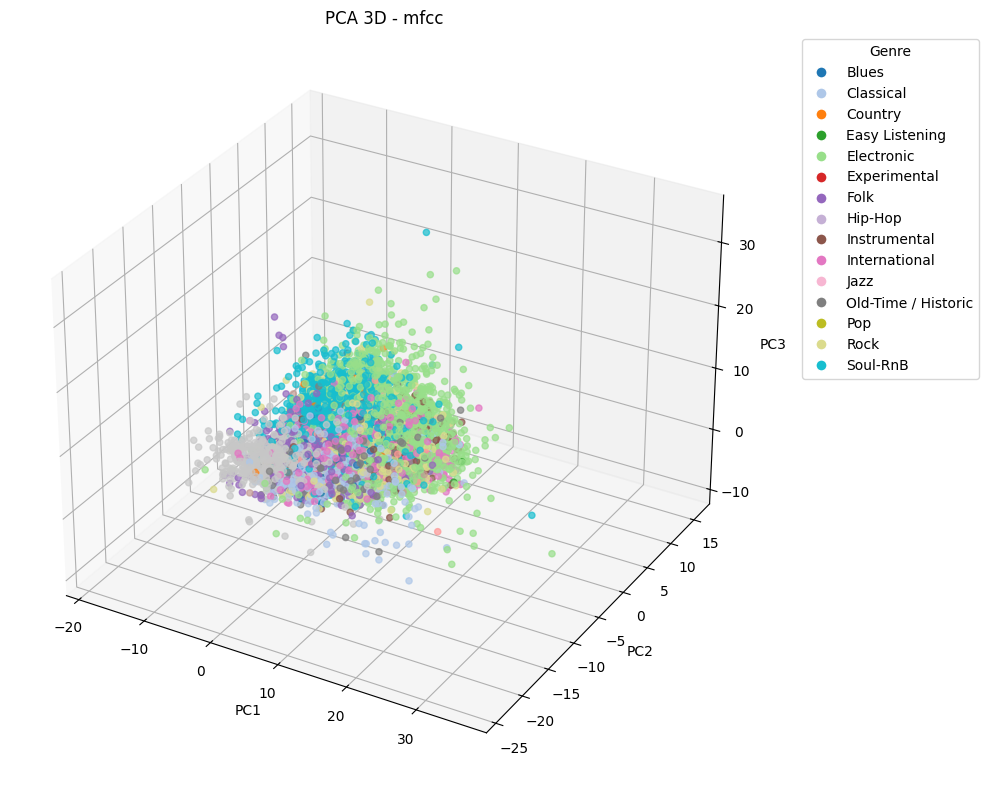

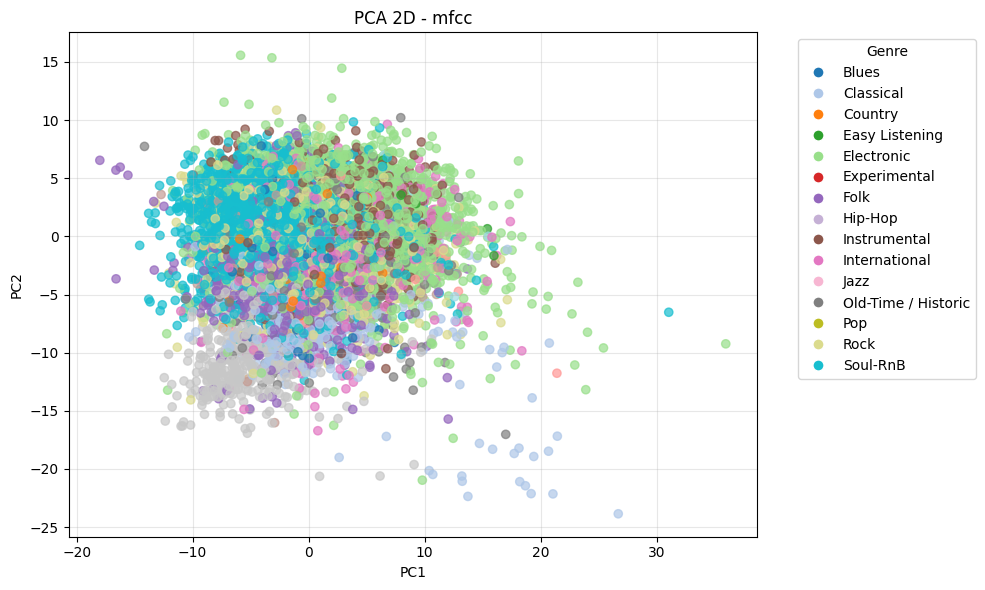

Processing feature set: zcr


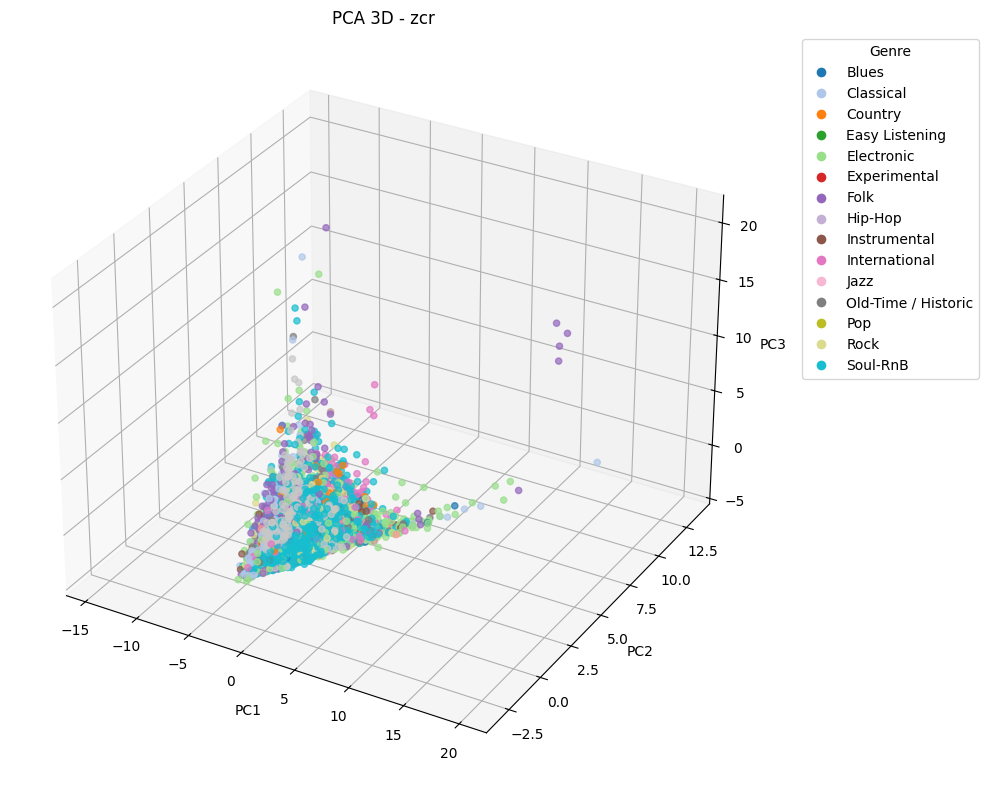

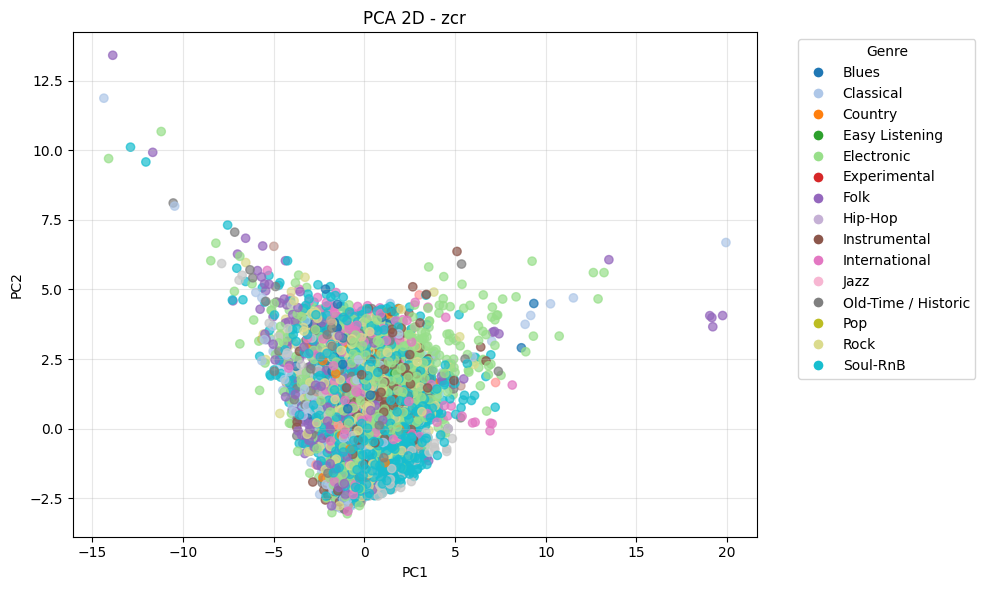

Processing feature set: tonnetz


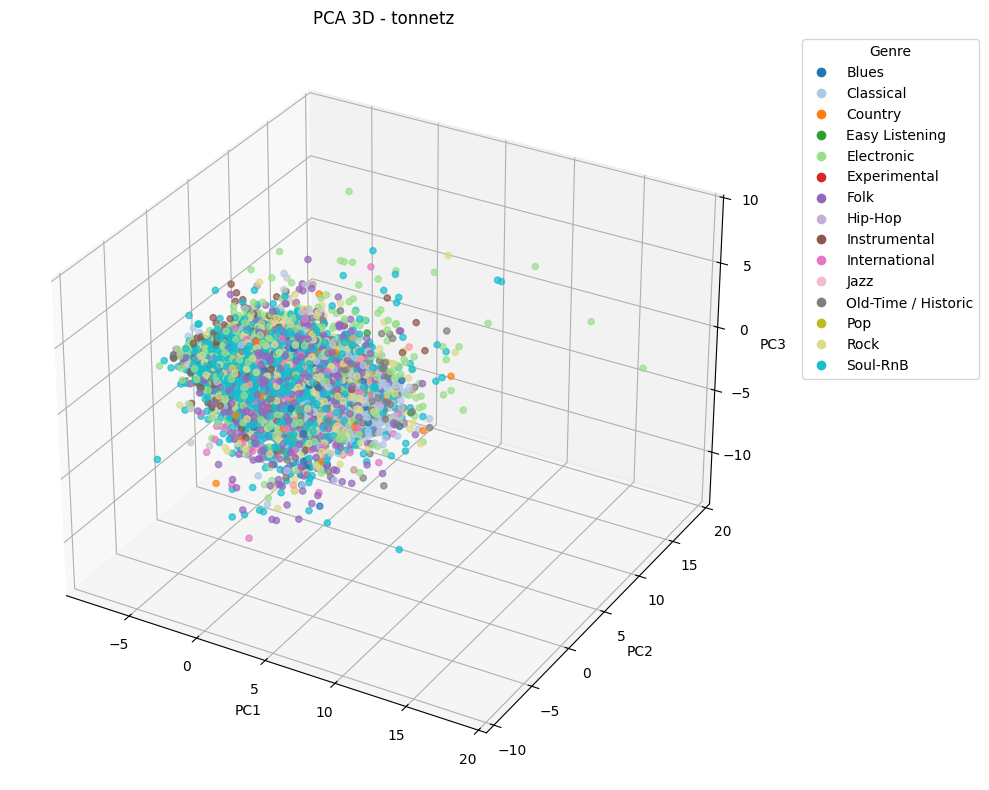

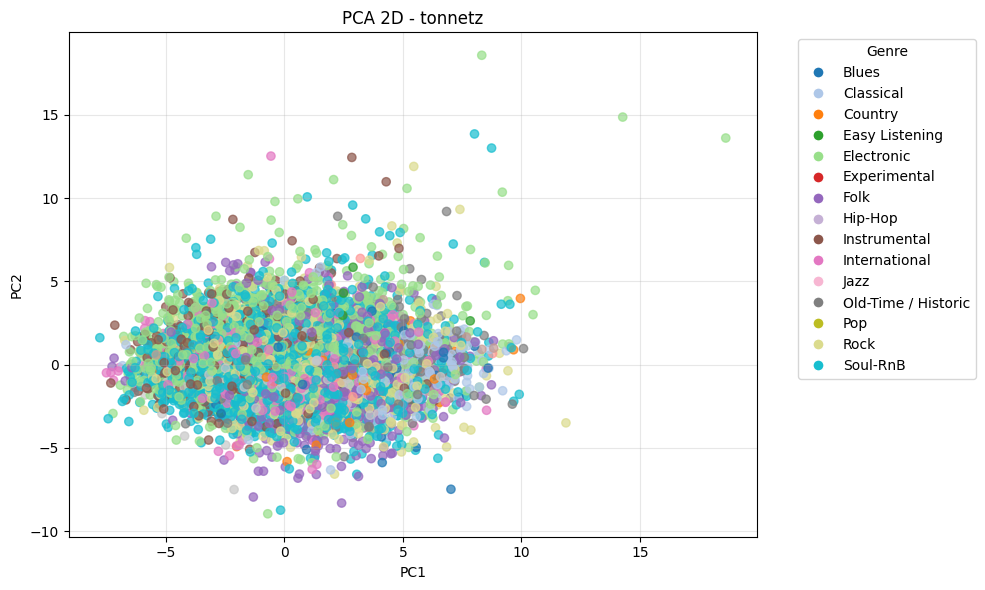

Processing feature set: social


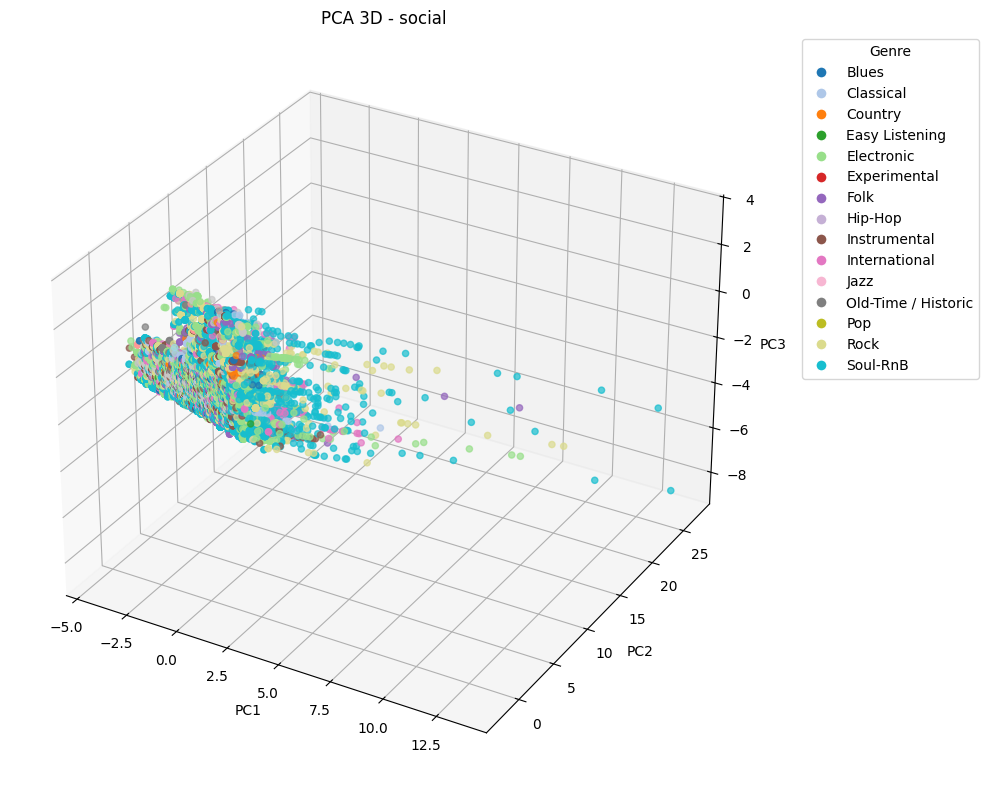

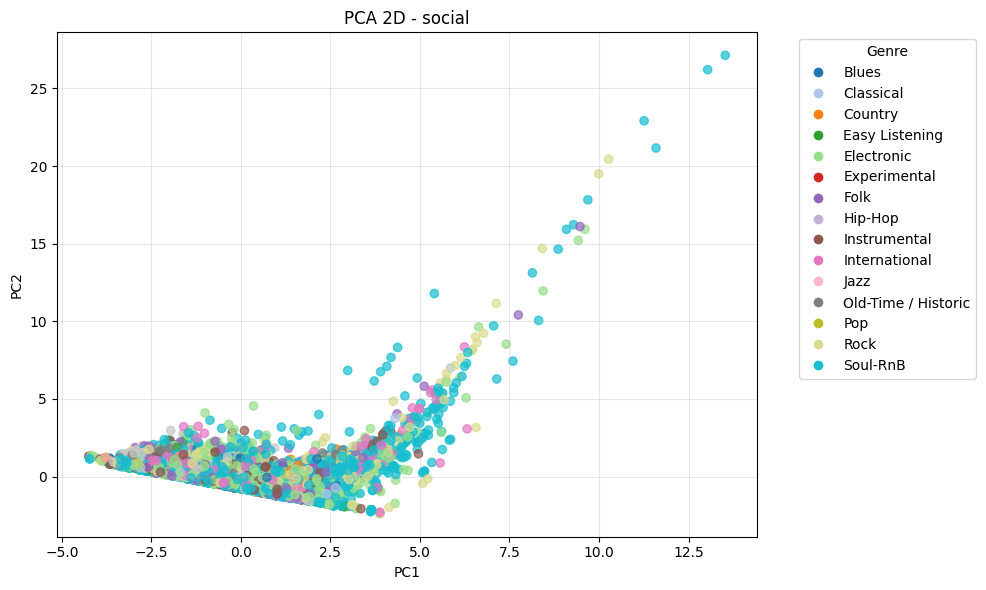

Processing feature set: chromacens


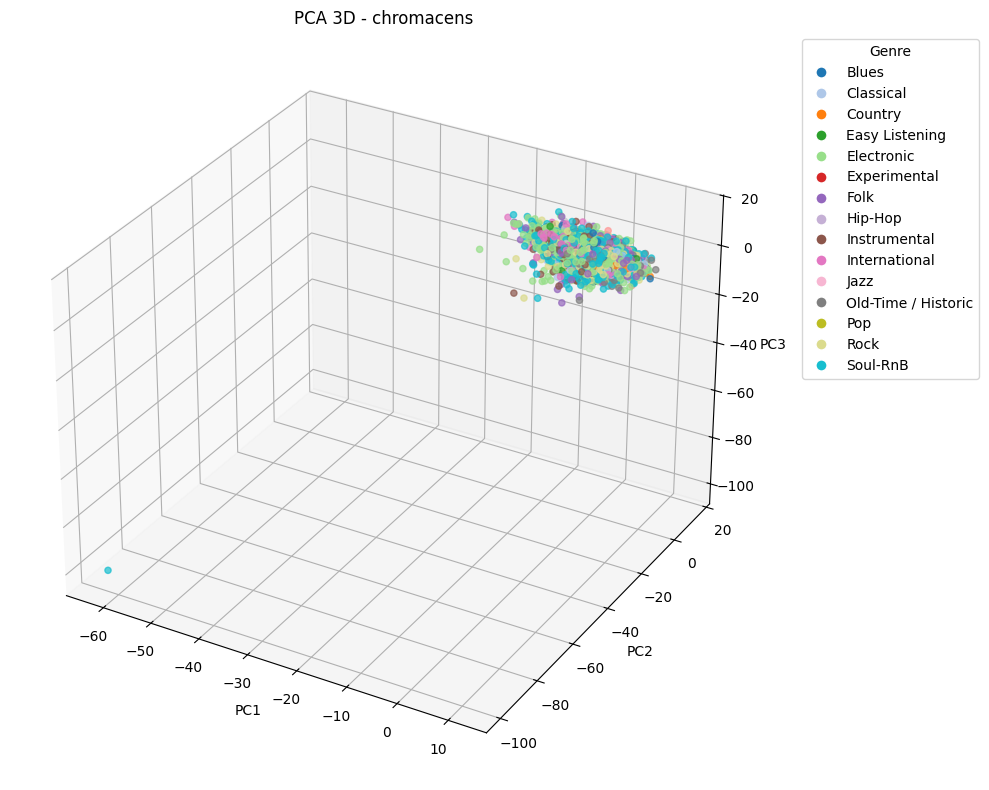

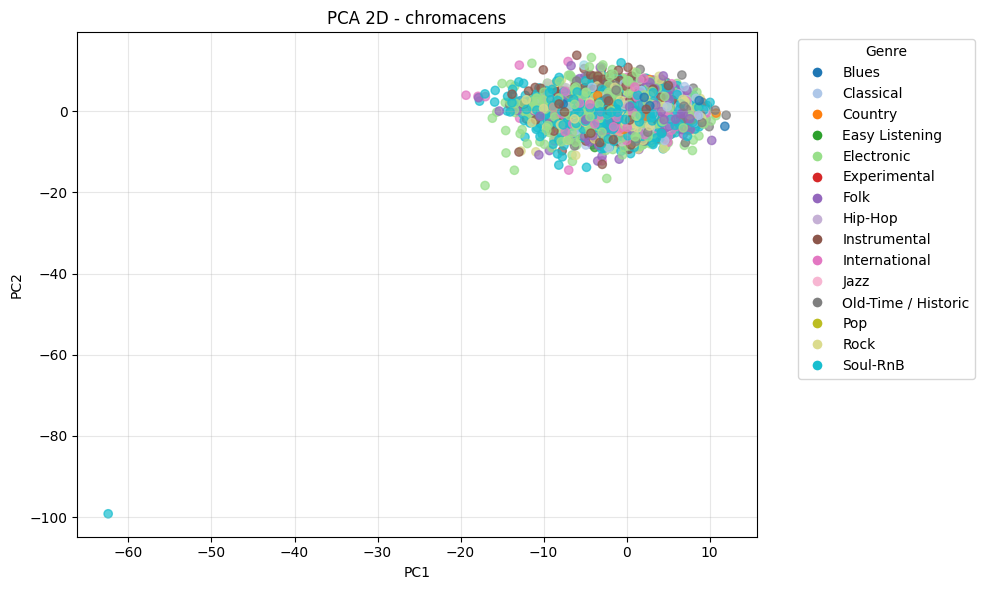

In [ ]:


for feature_file in features_files:
    feature_name = os.path.basename(feature_file).replace('.csv', '').split('_')[3]
    print(f'Processing feature set: {feature_name}')

    # Obtener datos PCA
    pca_3d_data = get_pca_data(feature_file, labels_file, n_components=3)
    pca_2d_data = get_pca_data(feature_file, labels_file, n_components=2)

    # Graficar en 3D con leyenda
    fig_3d, ax_3d = plot_3d(pca_3d_data, 
                            labels_encoded, 
                            f'PCA 3D - {feature_name}', 
                            label_names=label_names)
    plt.savefig(f'./figures/pca_3d_{feature_name}.png', bbox_inches='tight')
    plt.show()

    # Graficar en 2D con leyenda
    fig_2d, ax_2d = plot_2d(pca_2d_data,
                            labels_encoded, 
                            f'PCA 2D - {feature_name}',
                            label_names=label_names)
    plt.savefig(f'./figures/pca_2d_{feature_name}.png', bbox_inches='tight')
    plt.show()